In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

In [2]:
class channel:
    """The channel class represents the physical voltage inputs for the SLIM instrument.
    The channel class represents a MIPS input."""
    
    def __init__(self, description, voltage):
        self.description = description
        self.voltage = voltage
    
    def set_voltage(self, new_voltage):
        self.voltage = new_voltage

class region:
    """The region class represents the space between two voltage inputs. 
    Over a defined length, the two voltage inputs create the separation field."""
    def __init__(self, description, length, field_strength, rungs=None):
        self.description = description
        self.length = length
        self.field_strength = field_strength
        self.rungs=rungs
        
    def set_length(self, new_length):
        self.length = new_length
        
    def set_field_strength(self, new_field_strength):
        self.field_strength = new_field_strength
        
    def voltage_drop(self):
        voltage_drop = self.field_strength * self.length
        return voltage_drop
    
    def voltage_drop_per_rung(self):
        if self.rungs == None:
            raise ValueError('Number of rungs undefined.')
        else:
            voltage_drop_per_rung = self.voltage_drop() / self.rungs
            return voltage_drop_per_rung

In [3]:
# Define the region and channels of the CIF
CIF = region('CIF', 10.87, 0)
CSSO = channel('CCSO', 0)
CIF_CL_to_CCSO_drop = 0
CIF_CL = channel('CIFCL', 0)
CIF_to_CIF_CL_drop = 0
CIF_dc_out = channel('CIF_dc_out', 0)
CIF_dc_in = channel('CIF_dc_in', 0)

# Define the region and channels of SLIM 2
SLIM2 = region('SLIM2', 38.1, 0, rungs=250)
SLIM2_dc_in = channel('SLIM2_dc_in', 0)
SLIM2_dc_out = channel('SLIM2_dc_out', 0)
M8_sg = channel('Module 8 switch guard', 0)
SLIM2_to_CIF_drop = 0
M8_sg_bias = 0

#Define channels in the interface region
M8_orth_out = channel('M8_orth_out', 0)
M8_orth_in = channel('M8_orth_in', 0)
M8_orth = region('M8_orth', 3.5052, 0)
SLIM2_8M_interface = 0
M8_orth_to_SLIM2 = 0

#Define channels in the interface region
M7_orth_out = channel('M7_orth_out', 0)
M7_orth_in = channel('M7_orth_in', 0)
M7_orth = region('M7_orth', 3.5052, 0)
SLIM1_7M_interface = 0

# #Define drops in the region
M7_to_M8_drop = 0

#Define channels and regions
SLIM1_dc_out = channel('SLIM1_dc_out', 0)
SLIM1_dc_in = channel('SLIM1_dc_in', 0)
M7_sg = channel('Module 7 switch guard', 0)
SLIM1 = region('SLIM1', 45.72, 0, rungs=300)

#Define interface and voltage drops
SLIM1_to_7M_orth_drop = 0
M7_sg_bias = 0

In [4]:
def set_voltages():
    #Set CIF voltages
    CIF_CL.set_voltage(CSSO.voltage + CIF_CL_to_CCSO_drop)
    CIF_dc_out.set_voltage(CIF_CL.voltage + CIF_to_CIF_CL_drop)
    CIF_dc_in.set_voltage(CIF_dc_out.voltage + (CIF.voltage_drop()))

    #Set SLIM2 voltages
    SLIM2_dc_out.set_voltage(CIF_dc_in.voltage + SLIM2_to_CIF_drop)
    SLIM2_dc_in.set_voltage(SLIM2_dc_out.voltage + (SLIM2.field_strength * SLIM2.length))
    global SLIM2_8M_interface
    SLIM2_8M_interface = (SLIM2_dc_in.voltage - (SLIM2.voltage_drop() * (25.5/250)))
    M8_sg.set_voltage(SLIM2_8M_interface + M8_sg_bias)

    #Set 8M voltages
    M8_orth_out.set_voltage(SLIM2_8M_interface + M8_orth_to_SLIM2)
    M8_orth_in.set_voltage(M8_orth_out.voltage + M8_orth.voltage_drop())

    #Set 7M voltages
    M7_orth_out.set_voltage(M8_orth_in.voltage + M7_to_M8_drop)
    M7_orth_in.set_voltage(M7_orth_out.voltage + M7_orth.voltage_drop())
    global SLIM1_7M_interface
    SLIM1_7M_interface = M7_orth_in.voltage + SLIM1_to_7M_orth_drop
    M7_sg.set_voltage(SLIM1_7M_interface + M8_sg_bias)

    #Set voltages
    SLIM1_dc_out.set_voltage(SLIM1_7M_interface - SLIM1.voltage_drop()*(25.5/300))
    SLIM1_dc_in.set_voltage(SLIM1_dc_out.voltage + SLIM1.voltage_drop())

In [5]:
def generatePlot():
    f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
    f.set_figheight(5)
    f.set_figwidth(10)
    canvas = FigureCanvasTkAgg(f, master=window)
    canvas.draw()
    canvas.get_tk_widget().grid(column=3,rowspan=1)

In [12]:
def plotting_function(f, a0, a1):
#     f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
#     f.set_figheight(5)
#     f.set_figwidth(10)
    #full SLIM plot
    a0.cla()
    a1.cla()
    a0.set_title('Drift Region')
    a0.plot([0,10.87,10.87],[CIF_dc_in.voltage,CIF_dc_out.voltage,CIF_CL.voltage])
    a0.plot([-38.1,0,], [SLIM2_dc_in.voltage, SLIM2_dc_out.voltage])
    a0.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
    a0.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
    a0.plot([-37.338, -83.058], [SLIM1_dc_out.voltage, SLIM1_dc_in.voltage])

    #tee interface plot
    a1.set_title('Tee Interface')
    a1.scatter([-34.2138],[M8_sg.voltage])
    a1.scatter([-34.2138],[SLIM2_8M_interface])
    a1.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
    a1.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
    a1.scatter([-41.2242],[M7_sg.voltage])
    a1.scatter([-41.2242],[SLIM1_7M_interface])
    #a1.scatter(SLIM1_7M_interface_rung_location, SLIM1_7M_interface_new)
#     canvas = FigureCanvasTkAgg(f, master=window)
#     canvas.draw()
#     canvas.get_tk_widget().grid(column=3,rowspan=1)

# Application Window

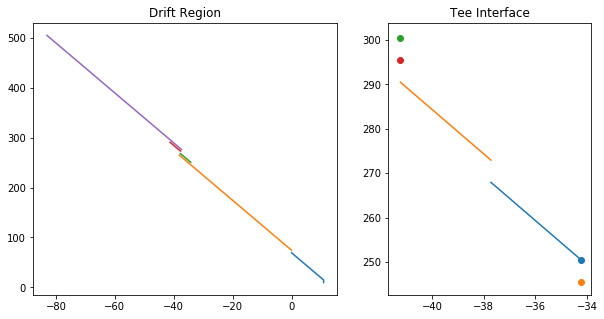

In [13]:
window = Tk()
window.title("SLIM voltage control")
window.geometry('1000x1000')

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
f.set_figheight(5)
f.set_figwidth(10)
canvas = FigureCanvasTkAgg(f, master=window)
canvas.draw()
canvas.get_tk_widget().grid(column=3,rowspan=1)

#CIF Region
ccso_lbl = Label(window, text="Collision Cell Static Offset", font=("Arial Bold", 10))
ccso_lbl.grid(column=0, row=0)
ccso_entry = Entry(window, width=5)
ccso_entry.grid(column=1, row=0)

CIF_to_CSSO_drop_lbl = Label(window, text="CIF CL to CSSO drop", font=("Arial Bold", 10))
CIF_to_CSSO_drop_lbl.grid(column=0, row=1)
CIF_to_CSSO_drop_entry = Entry(window, width=5)
CIF_to_CSSO_drop_entry.grid(column=1, row=1)

CIF_to_CIF_CL_drop_lbl = Label(window, text="CIF to CIF CL drop", font=("Arial Bold", 10))
CIF_to_CIF_CL_drop_lbl.grid(column=0, row=2)
CIF_to_CIF_CL_drop_entry = Entry(window, width=5)
CIF_to_CIF_CL_drop_entry.grid(column=1, row=2)

CIF_fs_lbl = Label(window, text="CIF field strength", font=("Arial Bold", 10))
CIF_fs_lbl.grid(column=0, row=3)
CIF_fs_entry = Entry(window, width=5)
CIF_fs_entry.grid(column=1, row=3)

#SLIM2 Region
SLIM2_to_CIF_drop_lbl = Label(window, text="SLIM2 to CIF drop", font=("Arial Bold", 10))
SLIM2_to_CIF_drop_lbl.grid(column=0, row=4)
SLIM2_to_CIF_drop_entry = Entry(window, width=5)
SLIM2_to_CIF_drop_entry.grid(column=1,row=4)

SLIM2_fs_lbl = Label(window, text="SLIM2 Field Strength", font=("Arial Bold", 10))
SLIM2_fs_lbl.grid(column=0, row=5)
SLIM2_fs_entry = Entry(window, width=5)
SLIM2_fs_entry.grid(column=1, row=5)

#Orthogonal Region
M8_sg_bias_lbl = Label(window, text="8M Switch Guard Bias", font=("Arial Bold", 10))
M8_sg_bias_lbl.grid(column=0, row=6)
M8_sg_bias_entry = Entry(window, width=5)
M8_sg_bias_entry.grid(column=1, row=6)

M8_orth_fs_lbl = Label(window, text="8M Orth Field Strength", font=("Arial Bold", 10))
M8_orth_fs_lbl.grid(column=0, row=7)
M8_orth_fs_entry = Entry(window, width=5)
M8_orth_fs_entry.grid(column=1, row=7)

M8_orth_to_SLIM2_lbl = Label(window, text="8M to SLIM2 Drop", font=("Arial Bold", 10))
M8_orth_to_SLIM2_lbl.grid(column=0, row=8)
M8_orth_to_SLIM2_entry = Entry(window, width=5)
M8_orth_to_SLIM2_entry.grid(column=1, row=8)

M7_to_M8_drop_lbl = Label(window, text="7M to 8M voltage drop", font=("Arial Bold", 10))
M7_to_M8_drop_lbl.grid(column=0, row=9)
M7_to_M8_drop_entry = Entry(window, width=5)
M7_to_M8_drop_entry.grid(column=1, row=9)

M7_orth_fs_lbl = Label(window, text="7M Orth Field Strength", font=("Arial Bold", 10))
M7_orth_fs_lbl.grid(column=0, row=10)
M7_orth_fs_entry = Entry(window, width=5)
M7_orth_fs_entry.grid(column=1, row=10)

#SLIM 1
SLIM1_to_7M_orth_drop_lbl = Label(window, text="SLIM1 to 7M voltage drop", font=("Arial Bold", 10))
SLIM1_to_7M_orth_drop_lbl.grid(column=0, row=11)
SLIM1_to_7M_orth_drop_entry = Entry(window, width=5)
SLIM1_to_7M_orth_drop_entry.grid(column=1, row=11)

M7_sg_bias_lbl = Label(window, text="7M SG Bias", font=("Arial Bold", 10))
M7_sg_bias_lbl.grid(column=0, row=12)
M7_sg_bias_entry = Entry(window, width=5)
M7_sg_bias_entry.grid(column=1, row=12)

SLIM1_fs_lbl = Label(window, text="SLIM1 Field Strength", font=("Arial Bold", 10))
SLIM1_fs_lbl.grid(column=0, row=13)
SLIM1_fs_entry = Entry(window, width=5)
SLIM1_fs_entry.grid(column=1, row=13)

error_label = Label(window, text=None, font=("Arial Bold", 10))
error_label.grid(column=0, row=15)

def update_voltage_settings():
    try:
        CSSO.set_voltage(float(ccso_entry.get()))
        global CIF_CL_to_CCSO_drop
        CIF_CL_to_CCSO_drop = float(CIF_to_CSSO_drop_entry.get())
        global CIF_to_CIF_CL_drop
        CIF_to_CIF_CL_drop = float(CIF_to_CIF_CL_drop_entry.get())
        CIF.set_field_strength(float(CIF_fs_entry.get()))
        global SLIM2_to_CIF_drop
        SLIM2_to_CIF_drop = float(SLIM2_to_CIF_drop_entry.get())
        SLIM2.set_field_strength(float(SLIM2_fs_entry.get()))
        global M8_sg_bias
        M8_sg_bias = float(M8_sg_bias_entry.get())
        M8_orth.set_field_strength(float(M8_orth_fs_entry.get()))
        global M8_orth_to_SLIM2
        M8_orth_to_SLIM2 = float(M8_orth_to_SLIM2_entry.get())
        global M7_to_M8_drop
        M7_to_M8_drop = float(M7_to_M8_drop_entry.get())
        M7_orth.set_field_strength(float(M7_orth_fs_entry.get()))
        global SLIM1_to_7M_orth_drop
        SLIM1_to_7M_orth_drop = float(SLIM1_to_7M_orth_drop_entry.get())
        SLIM1.set_field_strength(float(SLIM1_fs_entry.get()))
        global M7_sg_bias
        M7_sg_bias = float(M7_sg_bias_entry.get())
        error_label.configure(text="")
    except ValueError:
        error_label.configure(text="Voltage entries could not be converted to numbers.")

update_voltages_btn = Button(window, text="Update voltages", command=update_voltage_settings)
update_voltages_btn.grid(column=0, row=14)

set_voltages_btn = Button(window, text="Set Voltages", command=set_voltages)
set_voltages_btn.grid(column=0, row=15)

# f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
# f.set_figheight(5)
# f.set_figwidth(10)

# canvas = FigureCanvasTkAgg(f, master=window)
# canvas.draw()
# canvas.get_tk_widget().grid(column=3,rowspan=1)

update_graph_btn = Button(window, text="Update Graph", command=plotting_function(f, a0, a1))
update_graph_btn.grid(column=0, row=16)

window.mainloop()

AttributeError: 'Figure' object has no attribute 'a0'

In [ ]:
set_voltages()

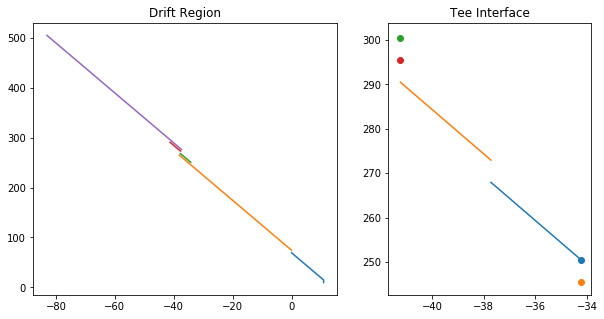

In [8]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
f.set_figheight(5)
f.set_figwidth(10)
#full SLIM plot
a0.set_title('Drift Region')
a0.plot([0,10.87,10.87],[CIF_dc_in.voltage,CIF_dc_out.voltage,CIF_CL.voltage])
a0.plot([-38.1,0,], [SLIM2_dc_in.voltage, SLIM2_dc_out.voltage])
a0.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
a0.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
a0.plot([-37.338, -83.058], [SLIM1_dc_out.voltage, SLIM1_dc_in.voltage])

#tee interface plot
a1.set_title('Tee Interface')
a1.scatter([-34.2138],[M8_sg.voltage])
a1.scatter([-34.2138],[SLIM2_8M_interface])
a1.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
a1.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
a1.scatter([-41.2242],[M7_sg.voltage])
a1.scatter([-41.2242],[SLIM1_7M_interface])
#a1.scatter(SLIM1_7M_interface_rung_location, SLIM1_7M_interface_new)

In [ ]:
type(f)

In [17]:
window

<tkinter.Tk object .>